# "[ML] Naive Bayesian_Korean"
> "한국어"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Naive Bayesian,korean]
- author: 도형준

# 데이터 불러오기

In [1]:
import pandas as pd
# https://github.com/e9t/nsmc/
file_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt'
df = pd.read_csv(file_url, sep='\t', index_col=0)
df.head()

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [3]:
df.isnull().sum()

document    8
label       0
dtype: int64

In [4]:
df[df['document'].isnull()]

,document,label
id,,
6369843,NaN,1
511097,NaN,1
2172111,NaN,1
402110,NaN,1
5942978,NaN,0
5026896,NaN,0
1034280,NaN,0
1034283,NaN,0


In [5]:
df2 = df.dropna()
df2.isnull().sum()

document    0
label       0
dtype: int64

In [6]:
df3 = pd.concat([df2.head(1000),df2.tail(1000)])
df3

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
3302770,쓰.레.기,0
5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0


# 전처리

In [7]:
sample_text = df3.document.iloc[0]
sample_text

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [8]:
# https://konlpy.org/ko/latest/index.html
# 형태소 분석기 konlpy pip install
!pip install konlpy --quiet

In [9]:
# Mecab은 추가 세팅 필요
from konlpy.tag import Okt

In [10]:
okt = Okt()

In [11]:
sample_text,okt.nouns(sample_text)

('어릴때보고 지금다시봐도 재밌어요ㅋㅋ', ['때', '보고', '지금', '다시'])

In [28]:
def NB_visual(a,b):
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer()
  cv.fit(a.apply(" ".join))
  x = cv.transform(a.apply(" ".join))
  y = b
  x_train, x_test, y_train, y_test = train_test_split(x, y)

  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import accuracy_score, confusion_matrix


  model = MultinomialNB()
  model.fit(x_train, y_train)
  pred = model.predict(x_test)

  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np

  cf_matrix=confusion_matrix(y_test, pred)
  group_names = ['TN','FP','FN','TP']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
  plt.title("CONFUSION MATRIX")
  plt.ylabel('True')
  plt.xlabel('Predicted')
  return print('accuracy_score: ',accuracy_score(y_test, pred),'\n'),plt.show()

In [ ]:
#@title df 전처리

#1. df3['nouns'] = df3.document.apply(okt.nouns) => 
df3['nouns'] = df3.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
df3['nouns']

accuracy_score:  0.664 



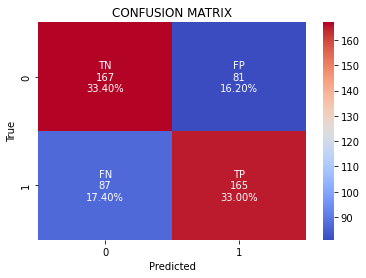

(None, None)

In [29]:
NB_visual(df3['nouns'],df3['label'])

In [12]:
#df3['nouns'] = df3.document.apply(okt.nouns)
df3['nouns'] = df3.document.apply(okt.nouns).apply(lambda nouns: [n for n in nouns if len(n) >= 2])
df3['nouns']

id
8112052                                       [때, 보고, 지금, 다시]
8132799     [디자인, 학생, 외국, 디자이너, 그, 일군, 전통, 통해, 발전, 문화, 산업,...
4655635                          [폴리스스토리, 시리즈, 부터, 뉴, 하나, 최고]
9251303                           [연기, 진짜, 개, 생각, 몰입, 진짜, 영화]
10067386                                   [안개, 밤하늘, 초승달, 영화]
                                  ...                        
8963373                                             [포켓, 몬스터]
3302770                                                [레, 기]
5458175              [완전, 사이코, 영화, 마지막, 더욱더, 이, 영화, 질, 트, 린다]
6908648                                    [왜, 라따뚜이, 스머프, 런가]
8548411                                   [포, 저그, 영차, 영차, 영차]
Name: nouns, Length: 2000, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df3.nouns.apply(" ".join))
cv.vocabulary_

{'보고': 1206,
 '지금': 2670,
 '다시': 551,
 '디자인': 722,
 '학생': 3120,
 '외국': 2059,
 '디자이너': 721,
 '일군': 2309,
 '전통': 2479,
 '통해': 2972,
 '발전': 1119,
 '문화': 1011,
 '산업': 1363,
 '사실': 1345,
 '우리나라': 2090,
 '시절': 1640,
 '열정': 1964,
 '노라노': 494,
 '사람': 1333,
 '폴리스스토리': 3067,
 '시리즈': 1628,
 '부터': 1266,
 '하나': 3098,
 '최고': 2814,
 '연기': 1945,
 '진짜': 2711,
 '생각': 1404,
 '몰입': 964,
 '영화': 1977,
 '안개': 1770,
 '밤하늘': 1124,
 '초승달': 2806,
 '사랑': 1336,
 '라면': 747,
 '처음': 2772,
 '완전': 2044,
 '감동': 52,
 '전쟁': 2475,
 '바보': 1067,
 '나이': 430,
 '훗날': 3280,
 '사하나': 1360,
 '감정': 62,
 '이해': 2273,
 '고질': 199,
 '오페라': 2024,
 '작품': 2381,
 '극단': 323,
 '갈림': 42,
 '반전': 1105,
 '평점': 3046,
 '긴장감': 374,
 '스릴': 1574,
 '전장': 2474,
 '공포': 219,
 '고시': 189,
 '소재': 1512,
 '관련': 236,
 '단연': 565,
 '가면': 10,
 '갈수록': 44,
 '더욱': 624,
 '밀회': 1061,
 '화이팅': 3243,
 '수작': 1549,
 '일본': 2315,
 '마음': 840,
 '임팩트': 2342,
 '일품': 2334,
 '제대로': 2541,
 '범죄': 1174,
 '스릴러': 1575,
 '마디': 827,
 '징텅': 2728,
 '교복': 249,
 '이의': 2256,
 '볼펜': 1241,
 '자국':

In [14]:
x = cv.transform(df3.nouns.apply(" ".join))

In [15]:
from sklearn.model_selection import train_test_split

y = df3.label
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, pred)

0.648

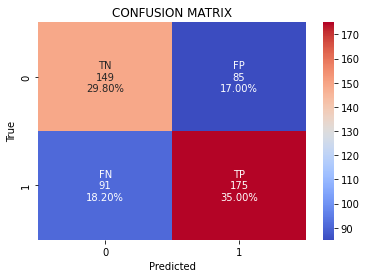

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cf_matrix=confusion_matrix(y_test, pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.title("CONFUSION MATRIX")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()